In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import uuid

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Step 1: Generate synthetic e-commerce data
def generate_ecommerce_data(n_records=50000):
    user_ids = [str(uuid.uuid4())[:8] for _ in range(5000)]
    pages = ['home', 'product', 'cart', 'checkout', 'purchase']
    actions = ['view', 'add_to_cart', 'purchase']
    
    data = {
        'user_id': np.random.choice(user_ids, n_records),
        'timestamp': [(datetime(2025, 6, 1) + timedelta(seconds=np.random.randint(0, 86400*7))) for _ in range(n_records)],
        'page': np.random.choice(pages, n_records, p=[0.4, 0.3, 0.15, 0.1, 0.05]),
        'session_id': [str(uuid.uuid4())[:8] for _ in range(n_records)],
        'action': np.random.choice(actions, n_records, p=[0.7, 0.2, 0.1])
    }
    return pd.DataFrame(data)

In [4]:
# Generate and save data to CSV
df = generate_ecommerce_data()
df.to_csv('ecommerce_data.csv', index=False)

In [5]:
# Step 2: Analyze customer journey
# Bounce rate: Single-page sessions
sessions = df.groupby('session_id').agg({'page': 'count', 'action': 'nunique'})
bounce_rate = (sessions['page'] == 1).mean() * 100

In [6]:
# Session duration (approximated as time between first and last interaction in session)
session_times = df.groupby('session_id').agg({'timestamp': ['min', 'max']})
session_times['duration'] = (session_times['timestamp']['max'] - session_times['timestamp']['min']).dt.total_seconds() / 60
avg_session_duration = session_times['duration'].mean()

In [7]:
# Conversion rate: Sessions with purchase
purchase_sessions = df[df['action'] == 'purchase']['session_id'].nunique()
total_sessions = df['session_id'].nunique()
conversion_rate = (purchase_sessions / total_sessions) * 100

In [8]:
# Funnel analysis
funnel = df.groupby('page').size().reindex(['home', 'product', 'cart', 'checkout', 'purchase'])
funnel = funnel / funnel['home'] * 100  # Normalize to percentage of home page visits

In [9]:
# Step 3: KPI Dashboard (Python placeholder for Power BI)
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

C:\Users\prana\AppData\Local\Temp\ipykernel_2936\3758315067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funnel.values, y=funnel.index, palette='Blues_d')


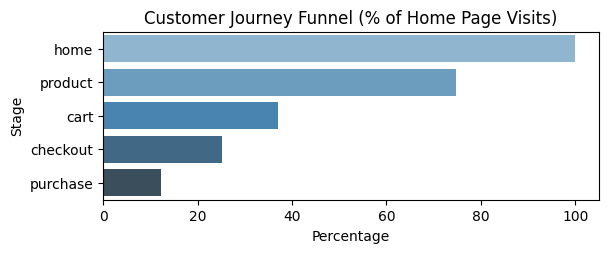

In [18]:
# Funnel chart
plt.subplot(2, 1, 1)
sns.barplot(x=funnel.values, y=funnel.index, palette='Blues_d')
plt.title('Customer Journey Funnel (% of Home Page Visits)')
plt.xlabel('Percentage')
plt.ylabel('Stage')
plt.savefig('funnel_chart')

C:\Users\prana\AppData\Local\Temp\ipykernel_2936\3658547666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Metric', data=kpi_data, palette='Greens_d')


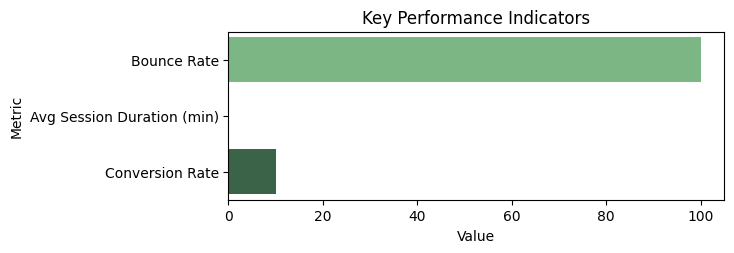

In [17]:
# KPI metrics
kpi_data = pd.DataFrame({
    'Metric': ['Bounce Rate', 'Avg Session Duration (min)', 'Conversion Rate'],
    'Value': [bounce_rate, avg_session_duration, conversion_rate]
})
plt.subplot(2, 1, 2)
sns.barplot(x='Value', y='Metric', data=kpi_data, palette='Greens_d')
plt.title('Key Performance Indicators')
plt.xlabel('Value')

plt.tight_layout
plt.savefig('kpi_dashboard.png')

In [13]:
# Step 4: Insights
insights = """
**Customer Journey Analysis Insights**:
- **Bounce Rate**: {:.2f}% of sessions involve only one page, indicating potential issues with landing page engagement.
- **Session Duration**: Average session lasts {:.2f} minutes, suggesting moderate user engagement.
- **Conversion Rate**: {:.2f}% of sessions result in a purchase, highlighting room for funnel optimization.
- **Funnel Drop-off**: Significant drop from product to cart (only {:.2f}% proceed), suggesting issues with product page UX or pricing.
**Recommendations**:
- Optimize product page load times and clarity of calls-to-action.
- A/B test pricing strategies to reduce cart abandonment.
- Enhance homepage content to lower bounce rate.
""".format(bounce_rate, avg_session_duration, conversion_rate, funnel['cart'])

In [14]:
# Save insights to a text file
with open('insights.txt', 'w') as f:
    f.write(insights)

In [15]:
# Print summary for verification
print("Bounce Rate: {:.2f}%".format(bounce_rate))
print("Average Session Duration: {:.2f} minutes".format(avg_session_duration))
print("Conversion Rate: {:.2f}%".format(conversion_rate))
print("Funnel Analysis:\n", funnel)
print("Data saved to ecommerce_data.csv")
print("Insights saved to insights.txt")
print("Dashboard saved to kpi_dashboard.png")

Bounce Rate: 100.00%
Average Session Duration: 0.00 minutes
Conversion Rate: 10.14%
Funnel Analysis:
 page
home        100.000000
product      74.642626
cart         37.022464
checkout     25.113314
purchase     12.262788
dtype: float64
Data saved to ecommerce_data.csv
Insights saved to insights.txt
Dashboard saved to kpi_dashboard.png
